In [18]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy as unp
from scipy.stats import chisquare

#Allgemeine Werte

In [19]:
g = ufloat(9.813, 0.001) #Erdbeschl. in m/(s^2)
r = ufloat(0.17, 0.001) #Abstand Gewicht-Rotationsachse

#Allgemeine Unsicherheiten

In [20]:
Ut = 0.2 #Reaktionszeit in s
Un = 0.5 #Drehzahlmessgerät war echt schwer zum einstellen
Ul = 0.001 #Unsicherheit des Lineals

# Aufgabe 1

#Ergebnisse

In [21]:
#Drehzahl
V1_n = ufloat(11.8, 0.5) #Kreisdrehzahl in HZ

#Periodendauer
V1_x_T = np.array([2*14.6, 2*7.6, 9.88, 7.27, 5.77, 4.88, 4.2, 3.65, 3.23, 2.84], dtype=object) *1/2# Periodendauern in s 

V1_U_T = np.asarray(1/2 * unp.sqrt((0.01 + 5*10**(-4) * V1_x_T)**2 + Ut**2) , dtype=float) #Pytag. Addition von ReakZeit und Systemunsicherheit

V1_T = np.full_like(V1_x_T, 1)

ii=np.arange(0, 9.1, 1, dtype=int)
for i in ii:
    V1_T[i] = ufloat(V1_T[i], V1_U_T[i])

#Massen:
V1_m = np.arange(0.050, 0.501, 0.050, dtype= object) #Massen in g
V1_U_m = np.array([0.00045, 0.00075, 0.00075, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.003], dtype= object) #MassenU laut skript

for i in ii:
    V1_m[i] = ufloat(V1_m[i], V1_U_m[i])


#Plott

In [22]:
#Drehmoment
V1_M = V1_m * g * r #Drehmoment in Nm

V1_1M = 1/V1_M #1/Drehmoment

V1_x_1M = np.full_like(V1_M, 1, dtype = float)
V1_U_1M = np.full_like(V1_M, 1, dtype= float)

for i in ii:
    V1_x_1M[i] = V1_1M[i].n #Werte ohne Fehler von 1/M
    V1_U_1M[i] = V1_1M[i].s #Unsicherheiten von 1/M
    

In [23]:
#Fit
FitT = lambda x, a, b: a*x+b
V1_U_1M = np.asarray(V1_U_1M, dtype=float)
k1, k1Cov = optimize.curve_fit(FitT, V1_x_1M, V1_x_T, sigma = V1_U_T)
print(k1)
print(np.sqrt(k1Cov[0][0]),np.sqrt(k1Cov[1][1]))
V1_a = ufloat(k1[0], np.sqrt(k1Cov[0][0]))
print(chisquare(V1_x_T, FitT(V1_x_1M, *k1)))

[ 1.22686854 -0.00215811]
0.010144696471415035 0.04782092067197208
Power_divergenceResult(statistic=0.012790323532707051, pvalue=0.9999999999974578)


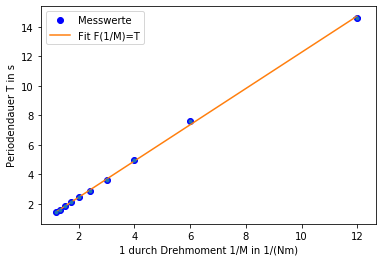

In [24]:
#Plotten
plt.plot(V1_x_1M, V1_x_T , "bo", label="Messwerte")
plt.errorbar(V1_x_1M, V1_x_T, yerr = V1_U_T, xerr = V1_U_1M, fmt=".")
plt.plot(V1_x_1M, FitT(V1_x_1M, *k1), label="Fit F(1/M)=T")

plt.ylabel("Periodendauer T in s")
plt.xlabel("1 durch Drehmoment 1/M in 1/(Nm)")
plt.legend()

In [25]:
#Hauptträgkeitsmoment
V1_Jx = V1_a /(4 * np.pi**2 * V1_n)

V1_Jx 

0.0026336392474590456+/-0.00011369984217978867

# Aufgabe 2:

#Messwerte

In [26]:
#Kreisdrehzahl
V2_x_n = np.array([6.8, 7.8, 8.7, 9.6, 10.5, 11.4, 12.3, 13.2, 14.1, 15.1, 16.0], dtype=object) # Kreisdrehzahl in s^(-1)

V2_n = np.full_like(V2_x_n, 1, dtype = object)

#Periodendauer
V2_x_T = np.array([4.32, 4.93, 5.48, 5.95, 6.57, 7.16, 7.7, 8.34, 8.84, 9.62, 10.07], dtype=object)*1/2 # Jeweils 2 Perioden in s

V2_T = np.full_like(V2_x_T, 1, dtype = object)

#Masse
V2_m = ufloat(0.2, 1.5 *10**(-6)) #Aufgelegtes Gewicht in kg

#Übertragung
ii=np.arange(0, 10.1, 1, dtype=int)
for i in ii:
    V2_n[i] = ufloat(V2_x_n[i], 0.5)
    V2_T[i] = ufloat(V2_x_T[i], 0.1) #Nur Reaktionszeit
    
V2_m

0.2+/-1.5e-06

#Plott

Text(0, 0.5, 'Periodendauer in s')

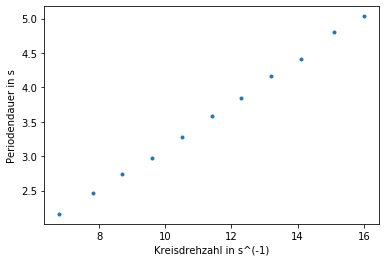

In [27]:
plt.plot(V2_x_n, V2_x_T, ".")
plt.xlabel("Kreisdrehzahl in s^(-1)")
plt.ylabel("Periodendauer in s")
#plt.errorbar(NV2, TV2, xerr=Un, yerr=Ur, color="green", ecolor="blue")


In [28]:
#Fit
FitT = lambda x, a, b: a*x+b
V2_U_T = np.full_like(V2_x_T, 0.2, dtype = float)
k2, k2Cov = optimize.curve_fit(FitT, V2_x_n, V2_x_T, sigma = V2_U_T)
print(k2)
print(np.sqrt(k2Cov[0][0]), np.sqrt(k2Cov[1][1]))
V2_a = ufloat(k2[0], np.sqrt(k2Cov[0][0]))

[ 0.31625519 -0.01818419]
0.00295481833422367 0.03477397289944413


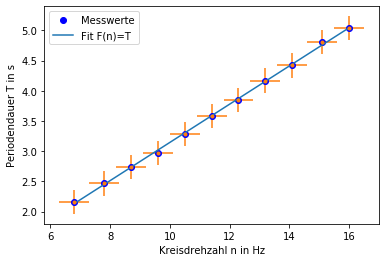

In [29]:
#Plotten
plt.plot(V2_x_n, V2_x_T , "bo", label = "Messwerte")
plt.plot(V2_x_n, FitT(V2_x_n, *k2), Label= "Fit F(n)=T")
plt.errorbar(V2_x_n, V2_x_T, xerr = 0.5, yerr = V2_U_T, fmt=".")

plt.ylabel("Periodendauer T in s")
plt.xlabel("Kreisdrehzahl n in Hz")
plt.legend()

In [30]:
#Ergebnisse:

V2_M = V2_m * g * r

V2_Jx = (V2_a * V2_M) / (4 * np.pi**2)

print(V2_Jx)
print(V2_M)

0.002673+/-0.000030
0.3336+/-0.0020


## Aufgabe 3

In [31]:
#Kreisdrehzahl
V3_n = unp.uarray([4, 4.3, 4.6, 5, 5.45, 6, 6.7, 7.5, 8.6, 10, 12], [0.2])

#Nutationsperiode mit Zeitlupe gemessen
V3_x_T = np.array([0.8, 0.83, 0.87, 0.86, 0.78, 0.68, 0.62, 0.42, 0.34, 0.38, 0.34], dtype=object)
V3_U_T = 0.01 + 5* 10**(-4) *V3_x_T

V3_T = unp.uarray(V3_x_T, V3_U_T)

3.7+/-0.5 0.02+/-0.09
Power_divergenceResult(statistic=0.10180719409418836, pvalue=0.9999999972700815)


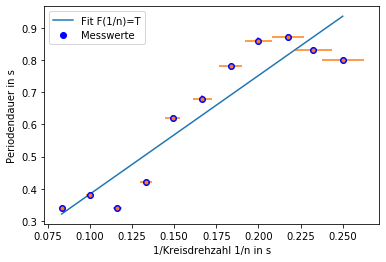

In [32]:
#Anpassung
FitT = lambda x, a, b: a * x + b
k, kCov = optimize.curve_fit(FitT, unp.nominal_values(1/V3_n), V3_x_T, sigma=(np.asarray(V3_U_T, dtype=float)))

#Übertragen
V3_a = ufloat(k[0], unp.sqrt(kCov[0][0]))
V3_b = ufloat(k[1], unp.sqrt(kCov[1][1]))
print(V3_a, V3_b)

#Fit
plt.plot(unp.nominal_values(1/V3_n), FitT(unp.nominal_values(1/V3_n), *k), label="Fit F(1/n)=T")

#Plot
plt.plot(unp.nominal_values(1/V3_n), V3_x_T, "bo",label="Messwerte")

plt.errorbar(1/unp.nominal_values(V3_n), V3_x_T, yerr=V3_U_T, xerr = unp.std_devs(1/V3_n), fmt=".")
plt.legend()

plt.xlabel("1/Kreisdrehzahl 1/n in s")
plt.ylabel("Periodendauer in s")
print(chisquare(V3_x_T, FitT(unp.nominal_values(1/V3_n), *k)))

In [33]:
#Ergebnisse:

V3_Js_V2 = V3_a * V2_Jx #Jx aus V2
V3_Js_V1 = V3_a * V1_Jx #Jx aus V1

V3_Js = (V3_Js_V2 + V3_Js_V1)/2  #Mittelwert

print("mit Jx aus V1 Js=", V3_Js_V1)
print("mit Jx aus V2 Js=", V3_Js_V2)
print("Mittelwert:", V3_Js)

mit Jx aus V1 Js= 0.0097+/-0.0014
mit Jx aus V2 Js= 0.0098+/-0.0013
Mittelwert: 0.0098+/-0.0013


## Aufgabe 4

In [34]:
rho_M = 8.4*10**3 
rho_E = 7.9*10**3
dE = ufloat(1.2, 0.005+1.2*10**(-4))*10**(-2) #Durchmesser Eisenkern mit unsicherhetien
r1_außen =  ufloat(2.45, 0.005+2.45*10**(-4))*10**(-2)
r1_innen =  ufloat(4.24, 0.005+4.24*10**(-4))*10**(-2)
r2 = ufloat(9.13, 0.005+9.13*10**(-4))*10**(-2)
r3 = ufloat(11.93, 0.005+11.93*10**(-4))*10**(-2)
h = ufloat(2.05, 0.005+2.05*10**(-4))*10**(-2)
h_außen = ufloat(0.65, 0.005+0.65*10**(-4))*10**(-2)
h_innen = ufloat(0.7, 0.005+0.7*10**(-4))*10**(-2) 

#Zylinder Qs 1 außen
rr1 =((r1_außen/2)**4-(dE/2)**4)*h_außen *rho_M

#Zylinder Qs 2 mitte
rr2 = ((r2/2)**4-(dE/2)**4)*(h-h_außen-h_innen)*rho_M

#Zylinder Qs 3 innen
rr3 = ((r1_innen/2)**4-(dE/2)**4)*h_innen *rho_M

#Eisenkern
rrE = (rE/2)**4 *h *rho_E

#Außenhohlzylinder

rrA = ((r3/2)**4-(r2/2)**4)*h*rho_M

#Trägheitsmoment:

J = 1/2 * np.pi * (rr1+rr2+rr3+rrE+rrA) 
J

NameError: name 'rE' is not defined